In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import corner
import scipy as sp
sns.set_style("ticks")

sns.set_context("paper", font_scale=0.7)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['xtick.major.size'] = 1.5
plt.rcParams['ytick.major.size'] = 1.5
outdir = '/Users/christof/dstrf/output/'

In [2]:
sweep = pd.read_csv('SweepParams/songtwin_sweep_params.csv')

In [3]:
sweep_rf = pd.read_csv("sweep_results/TimePeak.csv",header=None)

In [4]:
rf22 = sweep[:]["file.rf"] == 22
rf23 = sweep[:]["file.rf"] == 23
rf4 = sweep[:]["file.rf"] == 4

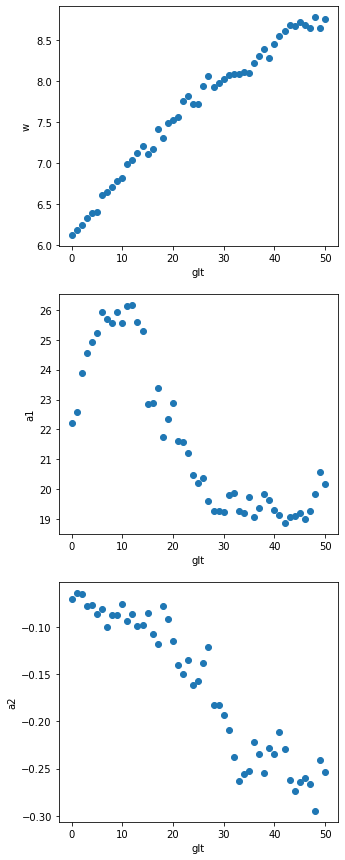

In [4]:
def paramplot(df):
    params = ["w","a1","a2"]
    fig,ax = plt.subplots(3,1,figsize = (5,15))
    for i in np.arange(0,len(params)):
        ax[i].plot(df["file.glt"],df[params[i]],"o")
        ax[i].set(xlabel="glt",ylabel = params[i])
paramplot(sweep[rf4])

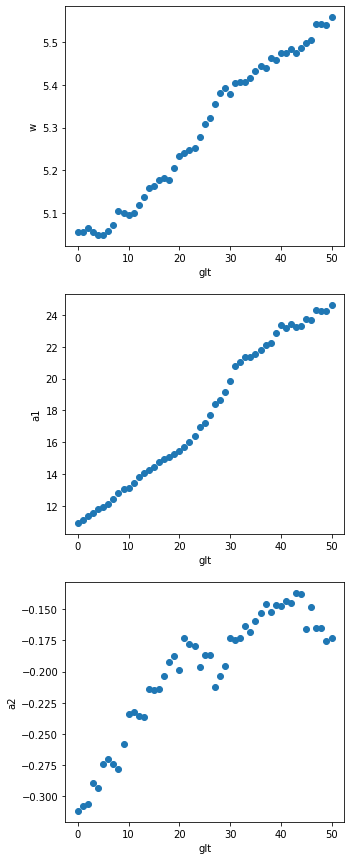

In [5]:
paramplot(sweep[rf22])

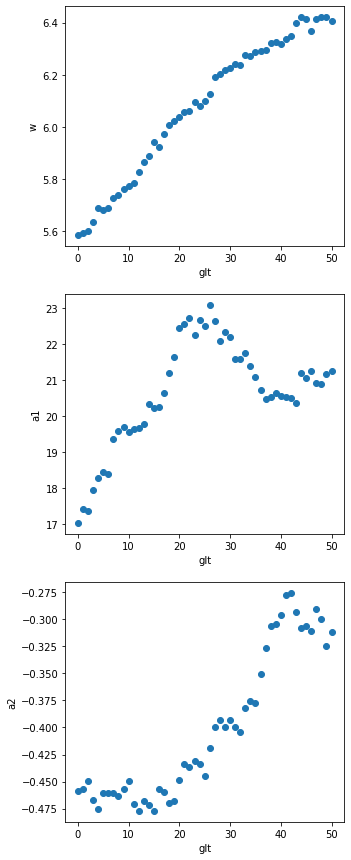

In [6]:
paramplot(sweep[rf23])

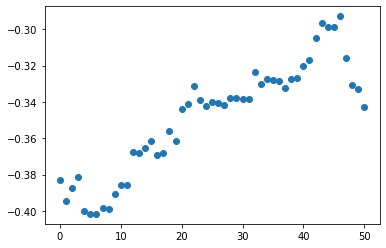

In [38]:
plt.plot(sweep[rf24]["file.glt"],sweep[rf24]["a2"],"o")

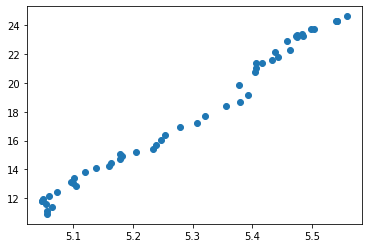

In [43]:
plt.plot(sweep[rf22]["w"],sweep[rf22]["a1"],"o")

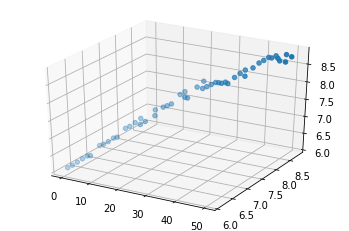

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sweep[rf4]["file.glt"],sweep[rf4]["w"],sweep[rf4]["w"])

In [ ]:
gs = gridspec.GridSpec(3, 3)

#Define paramter ranges
om_min, om_max = 3,11
a1_min, a1_max = -10, 70
a2_min, a2_max = -1.5,0.5


#Omega
ax1 = plt.subplot(gs[0, 0])
r4["Omega"].plot(kind="density",color=est_clr[0])
r22["Omega"].plot(kind="density",color=est_clr[1])
rf23["Omega"].plot(kind="density",color=est_clr[2])
plt.legend(("RF 4", "RF 22", "RF 23"), framealpha = 0, loc = "upper right", fontsize = "xx-small")
plt.ylabel("$\omega$")
#plt.xlim(om_min,om_max)
plt.xticks([])
plt.yticks([])

#Alpha1
ax2 = plt.subplot(gs[1,1])
phasic_0["Alpha1"].plot(kind="density",color=est_clr[0])
phasic_2["Alpha1"].plot(kind="density",color=est_clr[1])
tonic_0["Alpha1"].plot(kind="density",color=est_clr[2])
tonic_2["Alpha1"].plot(kind="density",color=est_clr[3])
plt.ylabel("")
plt.xlim(a1_min,a1_max)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks([])
plt.yticks([])

#Alpha2
ax3 = plt.subplot(gs[2,2])
phasic_0["Alpha2"].plot(kind="density",color=est_clr[0])
phasic_2["Alpha2"].plot(kind="density",color=est_clr[1])
tonic_0["Alpha2"].plot(kind="density",color=est_clr[2])
tonic_2["Alpha2"].plot(kind="density",color=est_clr[3])
plt.xlabel(r"$\alpha_2$")
plt.ylabel("")
plt.xlim(a2_min,a2_max)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.yticks([])
plt.xticks([-1.5,-1,-.5,0,.5],fontsize = 6)

#Omega-Alpha1
ax4 = plt.subplot(gs[1, 0])

plt.scatter(phasic_0["Omega"],
            phasic_0["Alpha1"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Omega"],
            phasic_2["Alpha1"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Omega"],
            tonic_0["Alpha1"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Omega"],
            tonic_2["Alpha1"],alpha = 0.5, s = 2,color=est_clr[3])

sns.despine(top=True, right=True, left=True, bottom=False)
plt.ylabel(r"$\alpha_1$")
plt.axis([om_min,om_max,a1_min,a1_max])
plt.xticks([])
plt.yticks([-10,10,30,50,70], fontsize = 6)

#Omega-Alpha2
ax5 = plt.subplot(gs[2, 0])

plt.scatter(phasic_0["Omega"],
            phasic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Omega"],
            phasic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Omega"],
            tonic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Omega"],
            tonic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[3])

plt.xlabel("$\omega$")
plt.ylabel(r"$\alpha_2$")
plt.axis([om_min,om_max,a2_min,a2_max])
plt.xticks([3,5,7,9,11], fontsize = 6)
plt.yticks([-1.5,-1,-.5,0,.5],fontsize = 6)
sns.despine(top=True, right=True, left=True, bottom=False)

#Alpha1-Alpha2
ax6 = plt.subplot(gs[2,1])

plt.scatter(phasic_0["Alpha1"],
            phasic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Alpha1"],
            phasic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Alpha1"],
            tonic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Alpha1"],
            tonic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[3])

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xlabel(r"$\alpha_1$")
plt.axis([a1_min,a1_max,a2_min,a2_max])
plt.yticks([])
plt.xticks([-10,10,30,50,70], fontsize = 6)
plt.savefig(os.path.join(outdir, "parameters_phi_corner.pdf"))

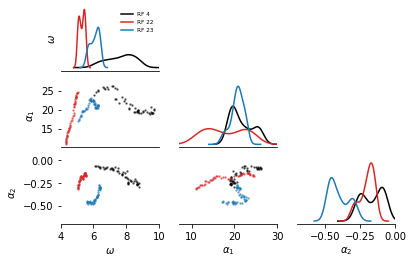

In [77]:
gs = gridspec.GridSpec(3, 3)
est_clr = ["black", "#d62728","#1f77b4"]

#Define paramter ranges
om_min, om_max = 4,10
a1_min, a1_max = 7, 30
a2_min, a2_max = -0.7,0


#Omega
ax1 = plt.subplot(gs[0, 0])
sweep[rf4]["w"].plot(kind="density",color=est_clr[0])
sweep[rf22]["w"].plot(kind="density",color=est_clr[1])
sweep[rf23]["w"].plot(kind="density",color=est_clr[2])
plt.legend(("RF 4", "RF 22", "RF 23"), framealpha = 0, loc = "upper right", fontsize = "xx-small")
plt.ylabel("$\omega$")
plt.xlim(om_min,om_max)
plt.xticks([])
plt.yticks([])

#Alpha1
ax2 = plt.subplot(gs[1,1])
sweep[rf4]["a1"].plot(kind="density",color=est_clr[0])
sweep[rf22]["a1"].plot(kind="density",color=est_clr[1])
sweep[rf23]["a1"].plot(kind="density",color=est_clr[2])
plt.ylabel("")
plt.xlim(a1_min,a1_max)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks([])
plt.yticks([])

#Alpha2
ax3 = plt.subplot(gs[2,2])
sweep[rf4]["a2"].plot(kind="density",color=est_clr[0])
sweep[rf22]["a2"].plot(kind="density",color=est_clr[1])
sweep[rf23]["a2"].plot(kind="density",color=est_clr[2])
plt.xlabel(r"$\alpha_2$")
plt.ylabel("")
plt.xlim(a2_min,a2_max)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.yticks([])
#plt.xticks([-1.5,-1,-.5,0,.5],fontsize = 6)

#Omega-Alpha1
ax4 = plt.subplot(gs[1, 0])

plt.scatter(sweep[rf4]["w"],
            sweep[rf4]["a1"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(sweep[rf22]["w"],
            sweep[rf22]["a1"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(sweep[rf23]["w"],
            sweep[rf23]["a1"],alpha = 0.5,s = 2,color=est_clr[2])
plt.ylabel(r"$\alpha_1$")
plt.xticks([])

#Omega-Alpha2
ax4 = plt.subplot(gs[2, 0])

plt.scatter(sweep[rf4]["w"],
            sweep[rf4]["a2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(sweep[rf22]["w"],
            sweep[rf22]["a2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(sweep[rf23]["w"],
            sweep[rf23]["a2"],alpha = 0.5,s = 2,color=est_clr[2])

sns.despine(top=True, right=True, left=True, bottom=False)
plt.ylabel(r"$\alpha_2$")
plt.xlabel("$\omega$")
plt.axis([om_min,om_max,a2_min,a2_max])
#plt.xticks([])
#plt.yticks([-10,10,30,50,70], fontsize = 6)

#Alpha1-Alpha2
ax6 = plt.subplot(gs[2,1])

plt.scatter(sweep[rf4]["a1"],
            sweep[rf4]["a2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(sweep[rf22]["a1"],
            sweep[rf22]["a2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(sweep[rf23]["a1"],
            sweep[rf23]["a2"],alpha = 0.5,s = 2,color=est_clr[2])

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xlabel(r"$\alpha_1$")
plt.axis([a1_min,a1_max,a2_min,a2_max])
plt.yticks([])
#plt.xticks([-10,10,30,50,70], fontsize = 6)
outdir = '/Users/christof/dstrf/output/'
plt.savefig(os.path.join(outdir, "sweep_parameters_corner.pdf"))

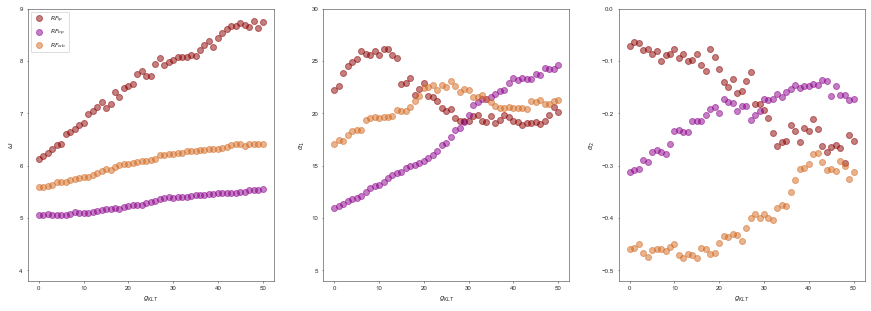

In [30]:
est_clr = ["darkred","darkmagenta","chocolate"]
yticks = [[4,5,6,7,8,9],[5,10,15,20,25,30],[-.5,-.4,-.3,-.2,-.1,0]]
ylims = [(3.8,9),(4,30),(-.52,0)]
ylabels = ["$\omega$",r"$\alpha_1$",r"$\alpha_2$"]
def paramplot(df1,df2,df3):
    params = ["w","a1","a2"]
    fig,ax = plt.subplots(1,3,figsize = (15,5))
    for i in np.arange(0,len(params)):
        ax[i].plot(df1["file.glt"],df1[params[i]],"o",color=est_clr[0],markersize=6,alpha=0.5)
        ax[i].set_yticks(yticks[i])
    for i in np.arange(0,len(params)):
        ax[i].plot(df2["file.glt"],df2[params[i]],"o",color=est_clr[1],markersize=6, alpha = 0.5)
    for i in np.arange(0,len(params)):
        ax[i].plot(df3["file.glt"],df3[params[i]],"o",color=est_clr[2],markersize=6, alpha = 0.5)
        ax[i].set_yticks(yticks[i])
        ax[i].set_xlabel("$g_{KLT}$")
        ax[i].set_ylabel(ylabels[i])
        ax[i].grid(False)
        ax[0].legend(["$RF_{lp}$","$RF_{bp}$","$RF_{wb}$"])
        ax[i].set_ylim(ylims[i])
paramplot(sweep[rf4],sweep[rf22],sweep[rf23])
plt.savefig("SweepParams.pdf")

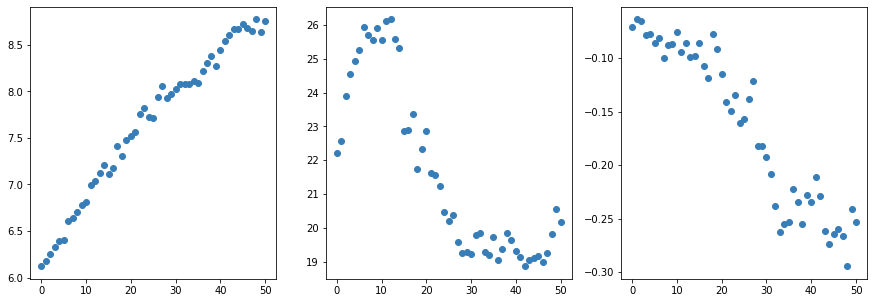

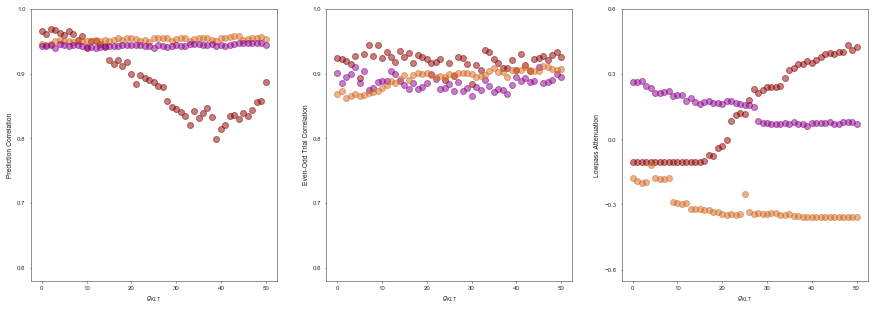

In [42]:
fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].plot(sweep[rf4]["file.glt"],sweep[rf4]["cor_pred"],"o",color = est_clr[0],markersize=6,alpha = 0.5)
ax[0].plot(sweep[rf22]["file.glt"],sweep[rf22]["cor_pred"],"o",color = est_clr[2],markersize=6, alpha = 0.5)
ax[0].plot(sweep[rf23]["file.glt"],sweep[rf23]["cor_pred"],"o",color = est_clr[1],markersize=6, alpha = 0.5)
ax[0].set_yticks([.6,.7,.8,.9,1])
ax[0].set_ylim([.58,1])
ax[0].set_xlabel("$g_{KLT}$")
ax[0].grid(False)
ax[0].set_ylabel("Prediction Correlation")

ax[1].plot(sweep[rf4]["file.glt"],sweep[rf4]["cor_data"],"o",color = est_clr[0],markersize=6,alpha = 0.5)
ax[1].plot(sweep[rf22]["file.glt"],sweep[rf22]["cor_data"],"o",color = est_clr[1],markersize=6, alpha = 0.5)
ax[1].plot(sweep[rf23]["file.glt"],sweep[rf23]["cor_data"],"o",color = est_clr[2],markersize=6, alpha = 0.5)
ax[1].set_yticks([.6,.7,.8,.9,1])
ax[1].set_ylim([.58,1])
ax[1].set_xlabel("$g_{KLT}$")
ax[1].grid(False)
ax[1].set_ylabel("Even-Odd Trial Correlation")

ax[2].plot(sweep_rf[rf4_rf]["glt"],
         (sweep_rf[rf4_rf]["True_Bandpass"]-
         sweep_rf[rf4_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[0],markersize=6,alpha=0.5)
ax[2].plot(sweep_rf[rf22_rf]["glt"],
         (sweep_rf[rf22_rf]["True_Bandpass"]-
         sweep_rf[rf22_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[1],markersize=6,alpha=0.5)
ax[2].plot(sweep_rf[rf23_rf]["glt"],
         (sweep_rf[rf23_rf]["True_Bandpass"]-
         sweep_rf[rf23_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[2],markersize=6,alpha=0.5)
ax[2].set_xlabel("$g_{KLT}$")
ax[2].set_yticks([-0.6,-0.3,0,0.3,0.6])
ax[2].set_ylim([-0.65,.6])
ax[2].grid(False)
ax[2].set_ylabel("Lowpass Attenuation")
plt.savefig("SweepParams_BCD.pdf")

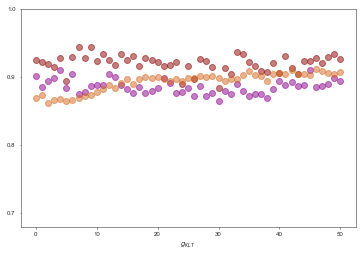

In [12]:

plt.plot(sweep[rf4]["file.glt"],sweep[rf4]["cor_data"],"o",color = est_clr[0],markersize=6,alpha = 0.5)
plt.plot(sweep[rf22]["file.glt"],sweep[rf22]["cor_data"],"o",color = est_clr[1],markersize=6, alpha = 0.5)
plt.plot(sweep[rf23]["file.glt"],sweep[rf23]["cor_data"],"o",color = est_clr[2],markersize=6, alpha = 0.5)
plt.yticks([.7,.8,.9,1])
plt.ylim([.68,1])
plt.xlabel("$g_{KLT}$")
plt.grid(False)
plt.ylabel("")
plt.savefig("SweepEO.pdf")

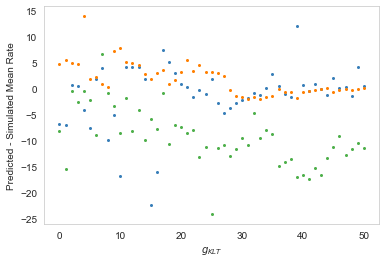

In [173]:
plt.plot(sweep[rf4]["file.glt"],sweep[rf4]["rate_mean_pred"]-sweep[rf4]["rate_mean_data"],
         "o",color = est_clr[0],markersize=2)
plt.plot(sweep[rf23]["file.glt"],sweep[rf22]["rate_mean_pred"]-sweep[rf22]["rate_mean_data"],
         "o",color = est_clr[1],markersize=2)
plt.plot(sweep[rf22]["file.glt"],sweep[rf23]["rate_mean_pred"]-sweep[rf23]["rate_mean_data"],
         "o",color = est_clr[2],markersize=2)
plt.grid(False)
plt.xlabel("$g_{KLT}$")
plt.ylabel("Predicted - Simulated Mean Rate")
#plt.title("Difference in Predicted and Simulated Mean Firing Rate")
plt.savefig("Experiment1MeanRateErrors.png")

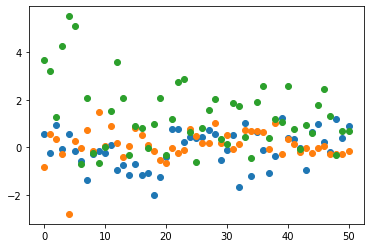

In [30]:
plt.plot(sweep[rf4]["file.glt"],sweep[rf4]["rate_sd_pred"]-sweep[rf4]["rate_sd_data"],"o")
plt.plot(sweep[rf22]["file.glt"],sweep[rf22]["rate_sd_pred"]-sweep[rf22]["rate_sd_data"],"o")
plt.plot(sweep[rf23]["file.glt"],sweep[rf23]["rate_sd_pred"]-sweep[rf23]["rate_sd_data"],"o")

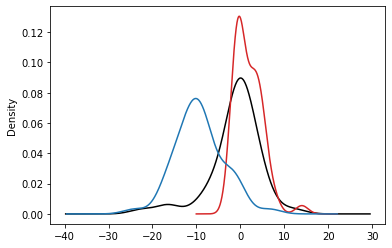

In [47]:
(sweep[rf4]["rate_mean_pred"]-sweep[rf4]["rate_mean_data"]).plot(kind="density",color = est_clr[0])
(sweep[rf22]["rate_mean_pred"]-sweep[rf22]["rate_mean_data"]).plot(kind="density",color= est_clr[1])
(sweep[rf23]["rate_mean_pred"]-sweep[rf23]["rate_mean_data"]).plot(kind="density",color= est_clr[2])

In [31]:
sp.stats.f_oneway(sweep[rf4]["rate_mean_pred"]-sweep[rf4]["rate_mean_data"],
                 sweep[rf22]["rate_mean_pred"]-sweep[rf22]["rate_mean_data"],
                 sweep[rf23]["rate_mean_pred"]-sweep[rf23]["rate_mean_data"])

F_onewayResult(statistic=69.28270490644388, pvalue=4.881171732733792e-22)

In [36]:
sweep_rf = sweep_rf.rename(columns={0:"True_Max_Freq",
                            1:"Expected_Max_Freq",
                            2:"Estimated_Max_Freq",
                            3:"True_Pwr_Diff",
                            4:"Expected_Pwr_Diff",
                            5:"Estimated_Pwr_Diff",
                            6:"True_Bandpass",
                            7:"Expected_Bandpass",
                            8:"Estimated_Bandpass",
                            9:"RF",
                            10:"glt"})

#sweep_rf = pd.merge(sweep_rf,filters,on = 'RF')

In [37]:
rf22_rf = sweep_rf[:]["RF"] == 22
rf23_rf = sweep_rf[:]["RF"] == 23
rf4_rf = sweep_rf[:]["RF"] == 4

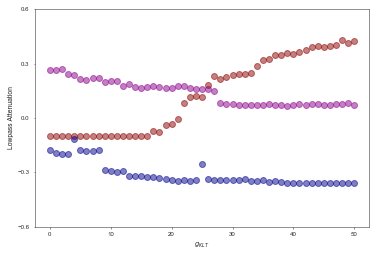

In [45]:
est_clr = ["darkred","darkmagenta","darkblue"]
plt.plot(sweep_rf[rf4_rf]["glt"],
         (sweep_rf[rf4_rf]["True_Bandpass"]-
         sweep_rf[rf4_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[0],markersize=6,alpha=0.5)
plt.plot(sweep_rf[rf22_rf]["glt"],
         (sweep_rf[rf22_rf]["True_Bandpass"]-
         sweep_rf[rf22_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[1],markersize=6,alpha=0.5)
plt.plot(sweep_rf[rf23_rf]["glt"],
         (sweep_rf[rf23_rf]["True_Bandpass"]-
         sweep_rf[rf23_rf]["Estimated_Bandpass"]),
         "o",color = est_clr[2],markersize=6,alpha=0.5)
plt.xlabel("$g_{KLT}$")
plt.yticks([-0.6,-0.3,0,0.3,0.6])
plt.grid(False)
plt.ylabel("Lowpass Attenuation")
plt.savefig("SweepAttenuation.png")

In [60]:
test = sweep[["file.rf","file.glt","cor_pred","cor_data"]]

In [61]:
test.columns = ["RF","glt","cor_pred","cor_data"]

In [67]:
Test = pd.merge(sweep_rf,test,on = ['RF','glt'])

In [79]:
Test["delta_l"] = Test["True_Bandpass"]-Test["Estimated_Bandpass"]

In [75]:
rf4 = Test[Test[:]["RF"] == 4]
rf22 = Test[Test[:]["RF"] == 22]
rf23 = Test[Test[:]["RF"] == 23]

Text(0, 0.5, 'Prediction Correlation')

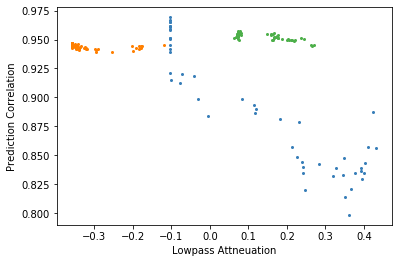

In [87]:
est_clr = ['#377eb8', '#ff7f00', '#4daf4a']
plt.plot(rf4["delta_l"], rf4["cor_pred"],
         "o",color = est_clr[0],markersize=2)
plt.plot(rf22["delta_l"],rf22["cor_pred"],
         "o",color = est_clr[2],markersize=2)
plt.plot(rf23["delta_l"],rf23["cor_pred"],
         "o",color = est_clr[1],markersize=2)
plt.xlabel("Lowpass Attneuation")
plt.grid(False)
plt.ylabel("Prediction Correlation")

Text(0, 0.5, 'Lowpass Attenuation')

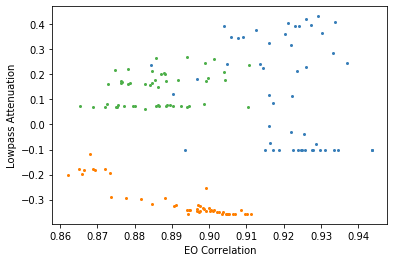

In [84]:
est_clr = ['#377eb8', '#ff7f00', '#4daf4a']
plt.plot(rf4["cor_data"], rf4["delta_l"],
         "o",color = est_clr[0],markersize=2)
plt.plot(rf22["cor_data"],rf22["delta_l"],
         "o",color = est_clr[2],markersize=2)
plt.plot(rf23["cor_data"],rf23["delta_l"],
         "o",color = est_clr[1],markersize=2)
plt.xlabel("EO Correlation")
plt.grid(False)
plt.ylabel("Lowpass Attenuation")